### Ideias
- Adicionar probabilidade de alta variação, além dos limites tradicionais
- Integração entre variáveis claramente correlacionadas
- H2 e Metano inversamente proporcionais de modo que a soma de seus valores apresente uma variação de 75-105% (tipicamente 93-98%) do total

- ✅ H2
- ✅ Metano
- Etileno
- Etano
- Propileno
- Propano
- N-Butano
- C5+
- CO
- CO2
- ✅ Enxofre

Node H2: Metano Enxofre 
Node Metano: 
Node Enxofre: 


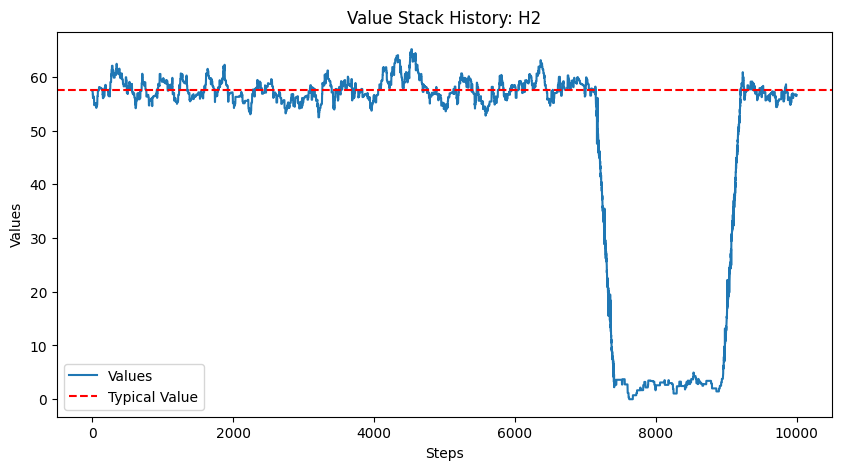

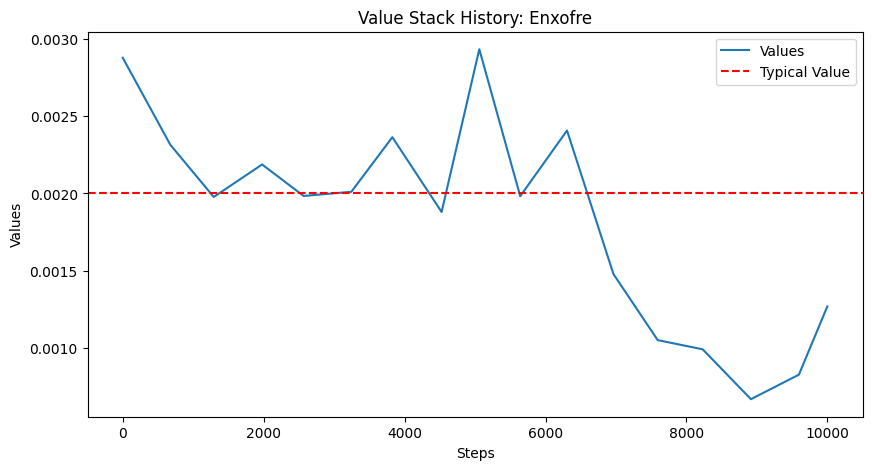

In [13]:
from Operators import GreatVariation, LittleVaration
from Relations import CorrelacaoH2Metano, CorrelacaoUsual, CorrelacaoGreatLittle
from TurbineSimulator import Graph, show_history, show_sum_history

H2      = GreatVariation(lower_bound=30, 
                   upper_bound=70, 
                   typical_value=57.5, 
                   name="H2", 
                   typical_bias=0.1,
                   typical_bias_prob=0.1,
                   theta=1.5, 
                   theta_prob=0.1,
                   exceed_prob=0.0001, 
                   exceed_duration_range=(180,300),
                   return_duration_range=(180,300), 
                   exceed_bias_range=(-5,5),
                   exceed_bias_prob=0.05,
                   exceed_peak_value_range=(0,5),
                   hold_duration_range=(720,2000),
                   hold_prob_vary=0.05,
                   hold_variation=1)
Metano  = GreatVariation(lower_bound=30, 
                   upper_bound=70, 
                   typical_value=40, 
                   name="Metano", 
                   typical_bias=0.1,
                   typical_bias_prob=0.1,
                   theta=1.5, 
                   theta_prob=0.1)
relation1 = CorrelacaoH2Metano(limit_lower_bound=75, 
                               limit_upper_bound=100,
                               typical_lower_bound=93,
                               typical_upper_bound=98)

Enxofre = LittleVaration(lower_bound=0, 
                         upper_bound=8, 
                         typical_value=0.002,
                         name="Enxofre", 
                         theta=0.001, 
                         steps_range=(480,700))
relation2 = CorrelacaoGreatLittle(correlation=0.4,
                                  typical_bias_prob=0.1,
                                  typical_bias=0.4,
                                  theta_prob=0.5)


# Propano = GreatVariation(lower_bound=0, upper_bound=0.8, typical_value=0.7,
#                     name="Propano", theta=0.01, typical_bias=0.1)
# relation2 = CorrelacaoUsual(correlation=0.94, trend_prob=0.5)
# relation3 = CorrelacaoUsual(correlation=0)

graph = Graph(random_seed=None)
# graph = Graph(random_seed=44)
node1 = graph.add_node(H2)
node2 = graph.add_node(Metano)
graph.add_edge(root=node1, child=node2, strategy=relation1)
node3 = graph.add_node(Enxofre)
graph.add_edge(root=node1, child=node3, strategy=relation2)
# node4 = graph.add_node(Propano)
# graph.add_edge(root=node2, child=node3, strategy=relation2)
# graph.add_edge(root=node2, child=node4, strategy=relation3)

graph.display()
graph.simulate(10000)
# graph.simulate(6000)
node1.op.show_history()
# node2.op.show_history()
node3.op.show_history()
# node4.op.show_history()

# show_history(nodes=[node1, node2])
# show_sum_history(node1, node2)

In [13]:
import pandas as pd

node3.op.stack
# Create a DataFrame with the stack history of node3
df = pd.DataFrame(node3.op.stack)
print(df.describe())

                  0
count  10000.000000
mean       0.002005
std        0.000045
min        0.001719
25%        0.001991
50%        0.002001
75%        0.002022
max        0.002265


Node H2: Metano 
Node Metano: Propano 
Node Propano: 


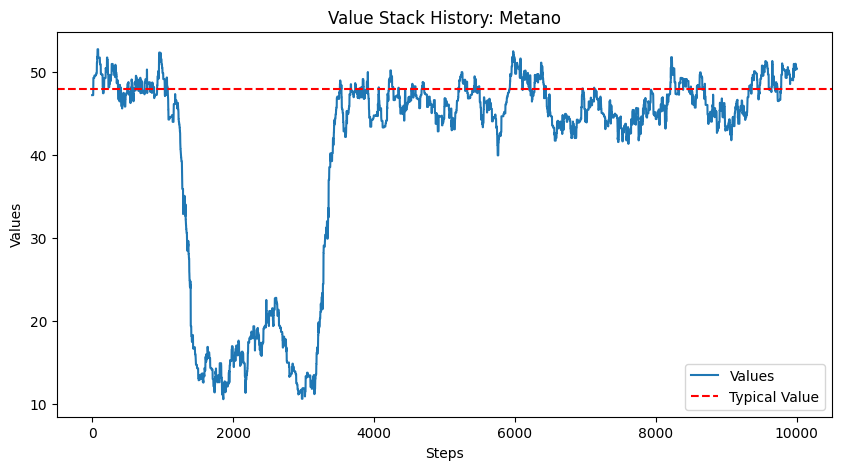

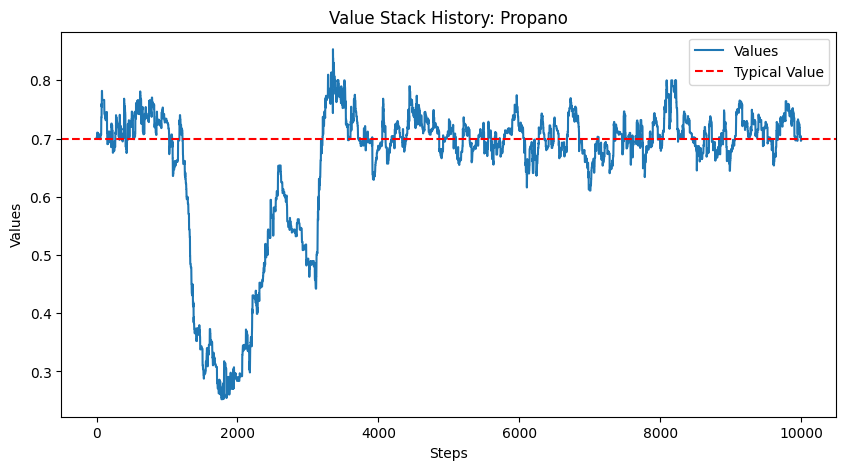

In [17]:
from TurbineSimulator import Standard, Graph, CorrelacaoH2Metano, CorrelacaoUsual
from TurbineSimulator import show_history, show_sum_history

H2      = Standard(lower_bound=30, upper_bound=60, typical_value=48.32, 
                   name="H2", theta=1.5, typical_bias=0.1,
                   exceed_prob=0.0001, 
                   exceed_duration_range=(240,300),
                   return_duration_range=(240,300), 
                   exceed_peak_value_range=(70,85),
                   hold_duration_range=(1440,1800),
                   hold_variation=1)
Metano  = Standard(lower_bound=39.24, upper_bound=70, typical_value=47.86, 
                   name="Metano", theta=1.5, typical_bias=0.1)
Propano = Standard(lower_bound=0, upper_bound=0.8, typical_value=0.7,
                    name="Propano", theta=0.01, typical_bias=0.1)
Enxofre = Standard(lower_bound=0, upper_bound=8, typical_value=0,
                    name="Enxofre", theta=0.01, typical_bias=0.9,
                    theta_prob=0)

relation1 = CorrelacaoH2Metano(limit_lower_bound=75, limit_upper_bound=100,
                              typical_lower_bound=93, typical_upper_bound=98)
relation2 = CorrelacaoUsual(correlation=0.94, trend_prob=0.5)
# relation3 = CorrelacaoUsual(correlation=0)

graph = Graph()
node1 = graph.add_node(H2)
node2 = graph.add_node(Metano)
node3 = graph.add_node(Propano)
# node4 = graph.add_node(Enxofre)
graph.add_edge(root=node1, child=node2, strategy=relation1)
graph.add_edge(root=node2, child=node3, strategy=relation2)
# graph.add_edge(root=node2, child=node4, strategy=relation3)

graph.display()
graph.simulate(10000)
# node1.op.show_history()
node2.op.show_history()
node3.op.show_history()
# node4.op.show_history()

# show_history(nodes=[node1, node2])
# show_sum_history(node1, node2)